In [1]:
import numpy as np
import pandas as pd

def topsis(csv_file, weights, impacts):
    # Load the CSV file
    df = pd.read_csv("model.csv")
    
    # Extract the decision matrix (excluding the first column)
    decision_matrix = df.iloc[:, 1:].values.astype(float)
    
    # Normalize the decision matrix
    normalized_matrix = decision_matrix / np.sqrt((decision_matrix ** 2).sum(axis=0))
    
    # Multiply by weights
    weighted_matrix = normalized_matrix * weights
    
    # Determine the ideal and negative-ideal solutions
    ideal_best = np.max(weighted_matrix, axis=0) if impacts[0] == '+' else np.min(weighted_matrix, axis=0)
    ideal_worst = np.min(weighted_matrix, axis=0) if impacts[0] == '+' else np.max(weighted_matrix, axis=0)
    
    # Calculate Euclidean distances
    distance_best = np.sqrt(((weighted_matrix - ideal_best) ** 2).sum(axis=1))
    distance_worst = np.sqrt(((weighted_matrix - ideal_worst) ** 2).sum(axis=1))
    
    # Calculate TOPSIS scores
    topsis_scores = distance_worst / (distance_best + distance_worst)
    
    # Add TOPSIS scores and ranks to the DataFrame
    df['TOPSIS Score'] = topsis_scores
    df['Rank'] = df['TOPSIS Score'].rank(ascending=False).astype(int)
    
    return df

# Define weights and impacts
weights = [1, 1, 1, 1]  # Equal weights for all features
impacts = ['+', '+', '+', '-']  # Coherence, Fluency, Relevance are positive; Perplexity is negative

# Apply TOPSIS
result = topsis('models.csv', weights, impacts)

# Print the result
print(result)

     Model  Coherence  Fluency  Relevance  Perplexity  TOPSIS Score  Rank
0    GPT-2          7        8          7          25      0.659192     1
1     BART          8        9          8          20      0.599561     2
2    GPT-3          9        9          9          15      0.423972     4
3  GPT-NEO          8        8          8          18      0.459633     3
4       T5          9        9          9          12      0.340808     5


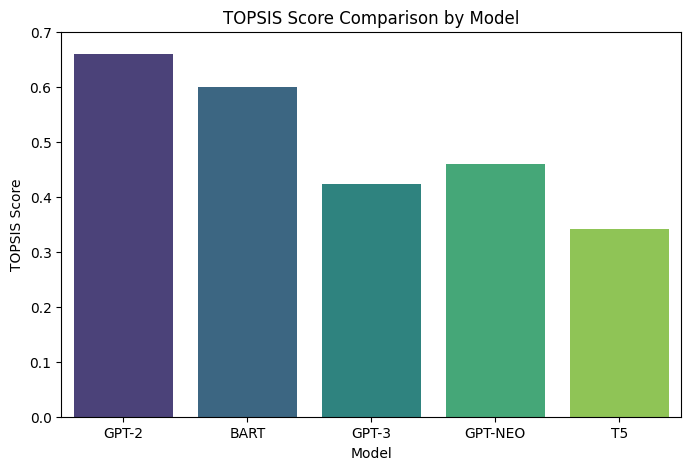

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample Data
data = {
    "Model": ["GPT-2", "BART", "GPT-3", "GPT-NEO", "T5"],
    "TOPSIS Score": [0.659192, 0.599561, 0.423972, 0.459633, 0.340808]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="TOPSIS Score", data=df, palette="viridis")

# Labels and Title
plt.xlabel("Model")
plt.ylabel("TOPSIS Score")
plt.title("TOPSIS Score Comparison by Model")
plt.ylim(0, 0.7)

# Show plot
plt.show()
